# Lívia Karoline de Freitas Carlos 772287

## Exercício 1: Ângulos entre vetores aleatórios em alta dimensão


### Objetivo
Explorar como o ângulo entre vetores aleatórios muda com o aumento da dimensão do espaço vetorial.

### Descrição
Você irá gerar pares de vetores aleatórios com componentes independentes e distribuídos segundo uma normal padrão $ \mathcal{N}(0, 1) $, e calcular o ângulo entre eles em diferentes dimensões.

### Etapas sugeridas

1. Para cada dimensão $d \in \{2, 5, 10, 20, 50, 100, 200, 500, 1000\}$:
   - Gere dois vetores aleatórios $ a, b \in \mathbb{R}^d $, com entradas iid $ \sim \mathcal{N}(0,1) $.
     - *Dica*: use `np.random.normal(loc=0, scale=1, size=d)`
   - Calcule o produto escalar \( \langle a, b \rangle \).
     - *Dica*: use `np.dot(a, b)`
   - Calcule as normas $ \|a\| $ e $ \|b\| $.
     - *Dica*: use `np.linalg.norm(v)`
   - Obtenha o cosseno do ângulo:
     $$
     \cos(\theta) = \frac{\langle a, b \rangle}{\|a\| \cdot \|b\|}
     $$
   - Calcule o ângulo $ \theta $ (em radianos ou graus).
     - *Dica*: use `np.arccos(...)` e depois `np.degrees(...)` se quiser converter para graus.

In [1]:
import pandas as pd
import numpy as np

In [2]:
dimensoes = [2, 5, 10, 20, 50, 100, 200, 500, 1000]
angulos_em_graus = []

In [3]:
for d in dimensoes:
    a = np.random.normal(loc=0, scale=1, size=d)
    b = np.random.normal(loc=0, scale=1, size=d)

In [4]:
produto_escalar = np.dot(a, b)
produto_escalar

np.float64(9.872128543407934)

In [6]:
norma_a = np.linalg.norm(a)
norma_a

np.float64(32.32431979647769)

In [7]:
norma_b = np.linalg.norm(b)
norma_b

np.float64(30.51398294480066)

In [11]:
cos_theta = produto_escalar / (norma_a * norma_b)
cos_theta

np.float64(0.01000881144504625)

In [12]:
cos_theta_1 = np.clip(cos_theta, -1, 1)
cos_theta_1

np.float64(0.01000881144504625)

In [13]:
theta_rad = np.arccos(cos_theta)
theta_rad

np.float64(1.5607873482346897)

In [14]:
theta_deg = np.degrees(theta_rad)
theta_deg

np.float64(89.42652777126322)

In [15]:
angulos_em_graus.append(theta_deg)
angulos_em_graus

[np.float64(89.42652777126322)]

In [16]:
print(f"Dimensão: {d} → Ângulo entre vetores: {theta_deg:.2f}°")

Dimensão: 1000 → Ângulo entre vetores: 89.43°


2. Repita esse procedimento para vários pares (ex: 1000) e plote o **histograma dos ângulos** obtidos para cada dimensão.


In [21]:
import matplotlib.pyplot as plt

In [18]:
dimensoes_3 = [2, 5, 10, 20, 50, 100, 200, 500, 1000]

n_repeticoes = 1000

for d in dimensoes_3:
 angulos = [] 
 for j in range(n_repeticoes):
    a = np.random.normal(0, 1, d)
    b = np.random.normal(0, 1, d) 
     
    dot = np.dot(a, b)
    norma_a = np.linalg.norm(a)
    norma_b = np.linalg.norm(b)
    
    cos_theta = np.clip(dot / (norma_a * norma_b), -1, 1)
    theta = np.degrees(np.arccos(cos_theta))
    angulos.append(theta)

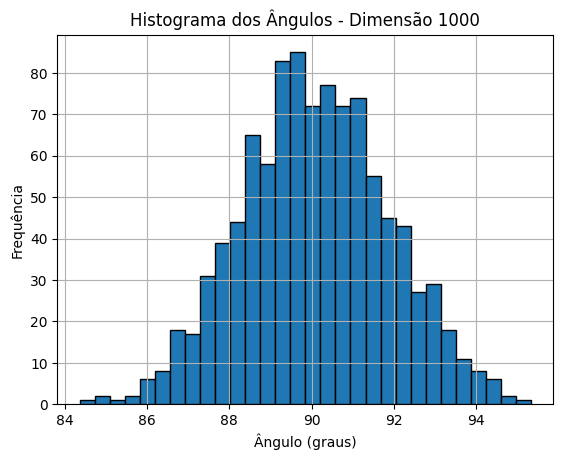

In [22]:
 plt.figure()
 plt.hist(angulos, bins=30, edgecolor='black')
 plt.title(f"Histograma dos Ângulos - Dimensão {d}")
 plt.xlabel("Ângulo (graus)")
 plt.ylabel("Frequência")
 plt.grid(True)
 plt.show()

##### 1. Como os ângulos se distribuem em dimensões baixas?
Em dimensões baixas (como 2 ou 5), os ângulos entre vetores aleatórios são bem variados.Eles podem ser pequenos, grandes ou próximos de 90 graus. A distribuição dos ângulos é mais espalhada.

##### 2. O que acontece com essa distribuição conforme a dimensão aumenta?
Conforme a dimensão aumenta, os ângulos começam a se concentrar em torno de 90 graus.A distribuição fica mais estreita e simétrica em torno de 90°.

##### 3.Por que, em alta dimensão, os vetores aleatórios tendem a formar ângulos próximos de 90 graus?
Porque em alta dimensão os vetores aleatórios estão mais 'espalhados' no espaço.Com muitas direções possíveis, é raro que dois vetores apontem para direções parecidas.Por isso, eles acabam ficando quase perpendiculares (90°) por pura aleatoriedade.

##### 4.Tente justificar essa observação com base nas propriedades da distribuição normal e no comportamento do produto escalar e das normas em alta dimensão
Os vetores são formados por componentes independentes com distribuição N(0,1), então têm média zero. O produto escalar entre dois vetores tende a ser pequeno (média próxima de zero), enquanto as normas dos vetores crescem com a raiz da dimensão. Assim, o cosseno do ângulo tende a zero, e o ângulo tende a 90 graus.

## Exercício 2: Volume da bola unitária dentro do cubo em alta dimensão

### Objetivo
Investigar como o volume da bola unitária se comporta em relação ao volume do cubo que a contém, conforme a dimensão aumenta.

### Fenômeno observado
O volume da bola unitária centrada na origem, contida no cubo $[-1, 1]^d$, **tende a zero** com o aumento da dimensão $d$.


### Tarefa

1. Para cada dimensão $d \in \{1, 2, 3, \dots, 20\}$:
   - Gere $n$ pontos aleatórios com distribuição uniforme no cubo $[-1, 1]^d$.
     - *Dica*: use `np.random.uniform(-1, 1, size=(n, d))`
   - Calcule a norma euclidiana de cada ponto.
     - *Dica*: use `np.linalg.norm(...)` ao longo do eixo 1.
   - Verifique quantos pontos caem dentro da **bola de raio 1** centrada na origem.
   - Estime o volume da bola pela proporção de pontos que caem dentro, multiplicada pelo volume do cubo $2^d$.

In [35]:
print(f"Dimensão {d}: volume estimado da bola = {volume_bola:.5f}")

Dimensão 20: volume estimado da bola = 0.00000


In [40]:
n = 100000
dimensoes_4 = range(1, 21)
volumes_estimados = []

for d in dimensoes_4:
    pontos = np.random.uniform(-1, 1, size=(n, d))
    normas = np.linalg.norm(pontos, axis=1)
    dentro_bola = np.sum(normas <= 1)
    proporcao = dentro_bola / n
    volume_cubo = 2 ** d
    volume_bola = proporcao * volume_cubo
    volumes_estimados.append(volume_bola)

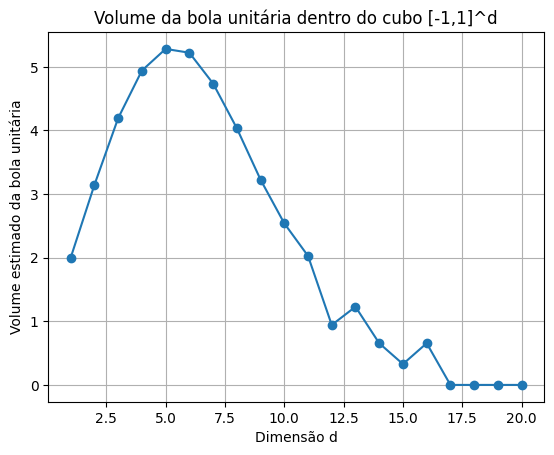

In [38]:
# Plotar resultado
plt.plot(dimensoes_4, volumes_estimados, marker='o')
plt.xlabel('Dimensão d')
plt.ylabel('Volume estimado da bola unitária')
plt.title('Volume da bola unitária dentro do cubo [-1,1]^d')
plt.grid(True)
plt.show()

2. Para comparação, calcule o **volume teórico da bola unitária** em $d$ dimensões:
   $$
   V_d = \frac{\pi^{d/2}}{\Gamma(d/2 + 1)}
   $$
   - *Dica*: use `scipy.special.gamma` para calcular a função gama.

In [42]:
from scipy.special import gamma
import math

In [47]:
volumes_teoricos = []
volumes_estimados = []

for d in dimensoes_4:
    pontos = np.random.uniform(-1, 1, size=(n, d))
    normas = np.linalg.norm(pontos, axis=1)
    dentro = np.sum(normas <= 1)
    proporcao = dentro / n
    
    volume_estimado = proporcao * (2 ** d)
    volumes_estimados.append(volume_estimado)
    
    volume_teorico = (math.pi ** (d / 2)) / gamma(d / 2 + 1)
    volumes_teoricos.append(volume_teorico)

In [48]:
volumes_teoricos

[np.float64(2.0),
 np.float64(3.141592653589793),
 np.float64(4.188790204786391),
 np.float64(4.934802200544679),
 np.float64(5.263789013914324),
 np.float64(5.167712780049969),
 np.float64(4.724765970331401),
 np.float64(4.058712126416768),
 np.float64(3.2985089027387064),
 np.float64(2.550164039877345),
 np.float64(1.8841038793898999),
 np.float64(1.3352627688545893),
 np.float64(0.9106287547832829),
 np.float64(0.5992645293207919),
 np.float64(0.38144328082330436),
 np.float64(0.23533063035889312),
 np.float64(0.140981106917139),
 np.float64(0.08214588661112819),
 np.float64(0.04662160103008853),
 np.float64(0.02580689139001405)]

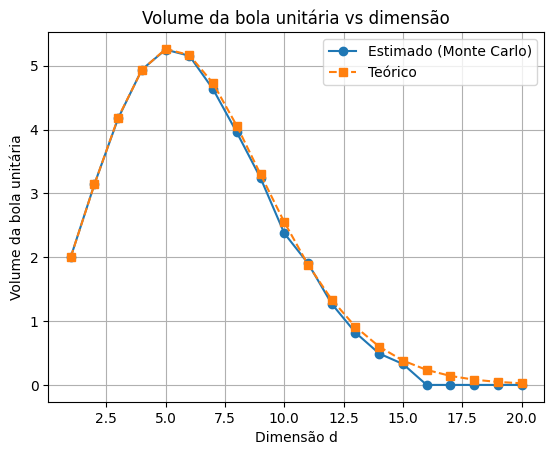

In [49]:
plt.plot(dimensoes, volumes_estimados, 'o-', label='Estimado (Monte Carlo)')
plt.plot(dimensoes, volumes_teoricos, 's--', label='Teórico')
plt.xlabel('Dimensão d')
plt.ylabel('Volume da bola unitária')
plt.title('Volume da bola unitária vs dimensão')
plt.legend()
plt.grid(True)
plt.show()

##### 1. O que acontece com o volume da bola unitária conforme a dimensão cresce?
O volume da bola unitária fica cada vez menor quando a dimensão aumenta.Em dimensões muito altas, o volume da bola praticamente some (fica perto de zero).

##### 2. Por que o volume estimado tende a zero, mesmo com muitos pontos?
Mesmo que a gente use muitos pontos aleatórios, a maioria vai cair fora da bola.Isso acontece porque o espaço do cubo cresce muito rápido (2^d),mas a parte da bola que "cabe" dentro dele vai ficando pequena demais.

##### 3. O que isso nos diz sobre a concentração da massa em espaços de alta dimensão?
Em espaços com muitas dimensões, a massa (ou os pontos) ficam concentrados longe do centro.É como se "tudo" estivesse nas bordas do cubo e não no meio.Por isso, técnicas em alta dimensão precisam de cuidado, porque a intuição de 2D/3D não funciona direito.

## Exercício 3: Concentração da massa na casca da bola unitária

### Objetivo
Investigar como, em alta dimensão, a maior parte da massa da bola unitária se concentra em uma casca fina próxima da superfície.

### Fenômeno observado
Para pontos gerados uniformemente dentro da bola unitária de $\mathbb{R}^d$, a maioria se concentra em uma fina camada próxima do raio 1 — ou seja, a massa se acumula na casca da bola quando $d$ cresce.

---

### Parte 1: Método geral de amostragem uniforme na bola unitária

Para gerar um ponto uniforme dentro da bola unitária em $\mathbb{R}^d$, faça:

1. Amostre um vetor $z \sim \mathcal{N}(0, I_d)$ (entradas independentes padrão-normal).
2. Normalize: $z_{\text{unit}} = z / \|z\|$ (direção uniforme na esfera).
3. Sorteie $u \sim \text{Uniform}(0, 1)$.
4. Defina o raio como $r = u^{1/d}$.
5. O ponto amostrado é: $x = r \cdot z_{\text{unit}}$.

In [62]:
m = 10000
outros = [2, 5, 10, 20, 50, 100]
todos_raios = {}

for o in outros:
    raios = []
    for j in range(m):
        z = np.random.normal(0, 1, o)
        z_unit = z / np.linalg.norm(z)
        u = np.random.uniform(0, 1)
        r = u ** (1 / o)
        raios.append(r)
    todos_raios[o] = raios

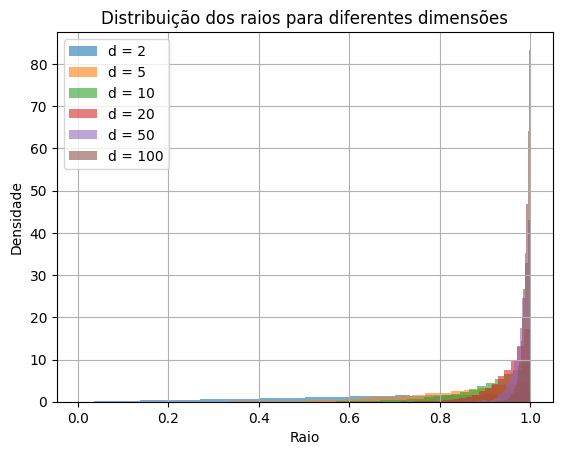

In [64]:
for o in outros:
 plt.hist(todos_raios[o], bins=30, alpha=0.6, density=True, label=f'd = {o}')

plt.title('Distribuição dos raios para diferentes dimensões')
plt.xlabel('Raio')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.show()

### Parte 2: Verificação visual no plano (caso $d = 2$)

Implemente o método acima com $d = 2$ e $n$ grande (por exemplo, $n = 10000$). Plote os pontos gerados no plano.

In [65]:
quantidade_pontos = 10000
D_2 = 2 
lista_pontos = []

for _ in range(quantidade_pontos):
    vetor_aleatorio = np.random.normal(0, 1, D_2)
    vetor_direcao = vetor_aleatorio / np.linalg.norm(vetor_aleatorio)
    raio_sorteado = np.random.uniform(0, 1)
    raio_final = raio_sorteado ** (1 / D_2)
    ponto_final = raio_final * vetor_direcao
    lista_pontos.append(ponto_final)
    
array_pontos = np.array(lista_pontos)

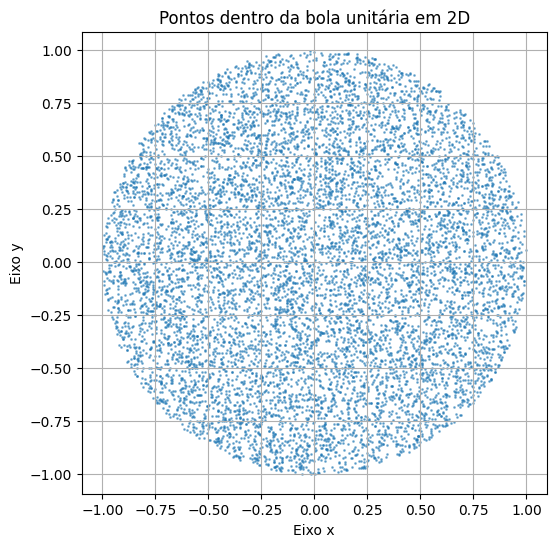

In [66]:
plt.figure(figsize=(6, 6))
plt.scatter(array_pontos[:, 0], array_pontos[:, 1], s=1, alpha=0.5)
plt.title('Pontos dentro da bola unitária em 2D')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.axis('equal')
plt.grid(True)
plt.show()

### Parte 3: Concentração da massa em alta dimensão

1. Para cada dimensão $d \in \{2, 5, 10, 20, 50, 100, 200\}$:
   - Gere $n$ pontos usando o método geral de amostragem descrito acima.
   - Para cada ponto, calcule a norma euclidiana $\|x\|$ (distância à origem).

2. Plote um **histograma das normas** para cada dimensão.

3. Calcule a **fração de pontos** cuja norma está no intervalo $[1 - \varepsilon, 1]$, com $\varepsilon = 0{,}01$ ou $0{,}05$.

In [68]:
total_amostras = 10000
lista_dimensoes = [2, 5, 10, 20, 50, 100, 200]
epsilon_1porcento = 0.01
epsilon_5porcento = 0.05
resultado_final = []

for valor_dimensao in lista_dimensoes:
    lista_normas = []
    for l in range(total_amostras):
        vetor_gaussiano = np.random.normal(0, 1, valor_dimensao)
        
        vetor_direcao = vetor_gaussiano / np.linalg.norm(vetor_gaussiano)
        
        raio_aleatorio = np.random.uniform(0, 1)
        
        raio_modificado = raio_aleatorio ** (1 / valor_dimensao)
        
        ponto_bola = raio_modificado * vetor_direcao
        
        norma_calculada = np.linalg.norm(ponto_bola)
        
        lista_normas.append(norma_calculada)

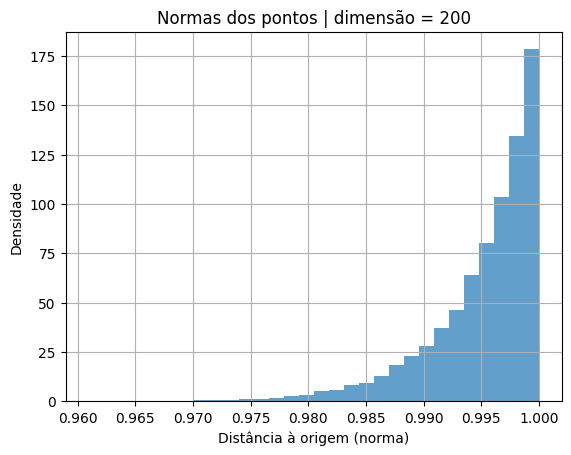

In [69]:
plt.hist(lista_normas, bins=30, alpha=0.7, density=True)
plt.title(f'Normas dos pontos | dimensão = {valor_dimensao}')
plt.xlabel('Distância à origem (norma)')
plt.ylabel('Densidade')
plt.grid(True)
plt.show()

In [70]:
dentro_1 = np.sum((np.array(lista_normas) >= 1 - epsilon_1porcento) &
(np.array(lista_normas) <= 1))
dentro_5 = np.sum((np.array(lista_normas) >= 1 - epsilon_5porcento) &
(np.array(lista_normas) <= 1))

In [71]:
fracao_1 = dentro_1 / total_amostras
fracao_5 = dentro_5 / total_amostras
resultado_final.append((valor_dimensao, fracao_1, fracao_5))

In [73]:
print("Dimensão | Fração [0.99, 1.00] | Fração [0.95, 1.00]")
for dim, f1, f5 in resultado_final:
    print(f"{dim:>8} | {f1:>18.4f} | {f5:>20.4f}")

Dimensão | Fração [0.99, 1.00] | Fração [0.95, 1.00]
     200 |             0.8626 |               1.0000


##### 1.Como se comporta a distribuição das distâncias à origem conforme a dimensão aumenta?

Quando a dimensão aumenta, os pontos ficam cada vez mais longe do centro.A maioria dos pontos fica quase grudada no raio 1, na "casca" da bola.Em dimensões altas, quase ninguém fica perto do meio da bola.

##### 2.A que distância da origem estão a maioria dos pontos?

A maioria está muito próxima do valor 1 (o raio da bola unitária).Por exemplo, em dimensão 100 ou 200, quase todos os pontos têm norma maior que 0.95 ou até 0.99.

##### 3.Qual é a consequência prática desse fenômeno para algoritmos que dependem de densidade ou centralidade?

Em alta dimensão, não tem mais "centro" de verdade porque quase tudo está longe dele.Isso atrapalha algoritmos que dependem de distância para comparar pontos (tipo kNN, clustering, etc).Parece que todos os pontos estão na "mesma distância", então fica difícil separar ou agrupar.